In [69]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score

In [70]:
(X,y), (X_test,y_test) = mnist.load_data()

In [71]:
print(X.shape, y.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


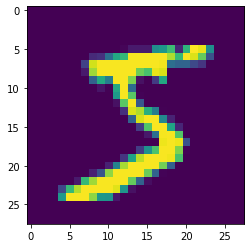

In [72]:
plt.imshow(X[0])

##### 각 그림은 28x28 에 해당하는 픽셀로 표현되고, main set은 60000개, test set 은 10000개의 데이터를 가지고 있다. 

# Softmax Regression

##### Data processing

28x28x60000 행렬로 표현되어있는 데이터를 784x60000인 2차원 행렬로 변환시켜주고, 255로나눠서 데이터 범위를 0~1로 설정한다.

In [73]:
X_smx = X.reshape(60000,28*28)
X_smx = X_smx/255
X_smx_test = X_test.reshape(10000,28*28)
X_smx_test = X_smx_test/255

0~9까지의 정수 데이터 값을 가지는 60000x1 행렬로 표현되어 있는 y를 각 데이터와 일치하게 60000x10로 바꿔준다 (Softmax 분석을 위한 필수과정)

In [74]:
y_smx= to_categorical(y)
y_smx_test = to_categorical(y_test)

##### Regression

In [75]:
smx = models.Sequential()
smx.add(layers.Dense(10, activation = 'softmax',input_shape=(28*28,)))
smx.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [76]:
smx.fit(X_smx,y_smx,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 1s 576us/step - loss: 0.7251 - accuracy: 0.8113
Epoch 2/30
1875/1875 [==============================] - 1s 554us/step - loss: 0.3071 - accuracy: 0.9146
Epoch 3/30
1875/1875 [==============================] - 1s 535us/step - loss: 0.2845 - accuracy: 0.9206
Epoch 4/30
1875/1875 [==============================] - 1s 551us/step - loss: 0.2750 - accuracy: 0.9235
Epoch 5/30
1875/1875 [==============================] - 1s 575us/step - loss: 0.2582 - accuracy: 0.9270
Epoch 6/30
1875/1875 [==============================] - 1s 547us/step - loss: 0.2623 - accuracy: 0.9275
Epoch 7/30
1875/1875 [==============================] - 1s 537us/step - loss: 0.2561 - accuracy: 0.9287
Epoch 8/30
1875/1875 [==============================] - 1s 540us/step - loss: 0.2518 - accuracy: 0.9299
Epoch 9/30
1875/1875 [==============================] - 1s 538us/step - loss: 0.2523 - accuracy: 0.9290
Epoch 10/30
1875/1875 [==============================] - 1s 537u

In [77]:
test_loss, test_acc = smx.evaluate(X_smx,  y_smx, verbose=2)

1875/1875 - 1s - loss: 0.2287 - accuracy: 0.9364


In [78]:
print('accuracy(Softmax) :', test_acc)

accuracy(Softmax) : 0.9364333152770996


### Softmax 방법을 통한 정확도는 대략 94% 이다.

# Support Vector Machine(SVM)

In [79]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

##### Data processing

28*28개의 features를 가진 상태에서 SVM 학습을 시켜준다. 이 때  SVM은 특히 Features의 scales에 민감하므로, 255로 나눠, 데이터 범위를 0~1로 설정한다

In [80]:
X_svm = X.reshape(60000,28*28)
X_svm = X_smx/255
X_svm_test = X_test.reshape(10000,28*28)
X_svm_test = X_smx_test/255

##### Regression

In [81]:
svm = LinearSVC()
svm.fit(X_svm,y)

LinearSVC()

In [82]:
cross_val_score(svm, X_svm, y, cv=3, scoring="accuracy")

array([0.8269 , 0.82675, 0.8396 ])

### Support Vector Machine 을 통해 분석한 후 교차검증을 통한 정확도는 대략 83%이다.

# Random Forest Classifier(RFC)

In [83]:
from sklearn.ensemble import RandomForestClassifier

##### Data processing

RFC는 features의 scales에 민감하지 않으므로, 데이터의 형태만 변경해준다. 

In [84]:
X_rfc = X.reshape(60000,28*28)
X_rfc_test = X_test.reshape(10000,28*28)

##### Regression

In [85]:
rfc = RandomForestClassifier()
rfc.fit(X_rfc,y)

RandomForestClassifier()

In [86]:
cross_val_score(rfc, X_rfc, y, cv=3, scoring="accuracy")

array([0.96475, 0.9635 , 0.96635])

### Random Forest Classifier방법을 통한 정확도는 대략 96%이다.

## Test set에 대한 정확도 분석 

#### SMX

In [107]:
y_smx_pred_raw = smx.predict(X_smx_test)

In [109]:
y_smx_pred = []
for i in range (len(y_smx_pred_raw)):
    y_smx_pred.append(np.argmax(y_smx_pred_raw[i]))

In [110]:
accuracy_score(y_smx_pred,y_test)

0.9264

#### SVM

In [87]:
y_svm_pred = svm.predict(X_svm_test)

In [88]:
accuracy_score(y_svm_pred,y_test)

0.853

#### RFC 

In [89]:
y_rfc_pred = rfc.predict(X_rfc_test)

In [106]:
accuracy_score(y_rfc_pred,y_test)

0.969

|accuracy(%)|Train set|Test set|
|:------:|:---:|:---:|
|Softmax|94|93|
|Support Vector Machine|85|83|
|RandomForest Classifier|97|96|

## 결론

- RandomForest Classifier > Softmax > Support Vector Machine 순서대로 높은 정확성을 보인다. 
- Test set의 크기(10000개)가 충분히 큰 만큼 Train set과의 정확도 차이는 크지 않은 것을 확인할 수 있다.
- SVC는 features의 종류가 너무 많을 경우, 소요시간이 너무 오래걸린다(1:1대응을 하려고 하기 때문), 이 때 선형 SVC를 이용하여 시간을 줄일 수 있다.